<a href="https://colab.research.google.com/github/TranTan1410/tuan13/blob/main/11_loai_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/btvn3/TIEN/train',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
validation_data=train_datagen.flow_from_directory('/content/drive/MyDrive/btvn3/TIEN/validation',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode ='categorical')
                                               

Found 220 images belonging to 11 classes.
Found 110 images belonging to 11 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 128)     3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 32)        36896     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 43808)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]
history=model.fit(training_data,
                  steps_per_epoch=len(training_data),
                  batch_size = 64,
                  epochs=100,
                  validation_data=validation_data,
                  validation_steps=len(validation_data),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
7/7 [==============================] - 25s 3s/step - loss: 5.3590 - accuracy: 0.1136 - val_loss: 2.3961 - val_accuracy: 0.1000
Epoch 2/100
7/7 [==============================] - 27s 4s/step - loss: 2.3982 - accuracy: 0.1136 - val_loss: 2.3925 - val_accuracy: 0.1273
Epoch 3/100
7/7 [==============================] - 23s 3s/step - loss: 2.3885 - accuracy: 0.1045 - val_loss: 2.3700 - val_accuracy: 0.1545
Epoch 4/100
7/7 [==============================] - 24s 4s/step - loss: 2.3548 - accuracy: 0.1364 - val_loss: 2.3115 - val_accuracy: 0.1818
Epoch 5/100
7/7 [==============================] - 23s 3s/step - loss: 2.3059 - accuracy: 0.1591 - val_loss: 2.2276 - val_accuracy: 0.2455
Epoch 6/100
7/7 [==============================] - 23s 3s/step - loss: 2.1813 - accuracy: 0.2545 - val_loss: 2.1306 - val_accuracy: 0.2636
Epoch 7/100
7/7 [==============================] - 23s 3s/step - loss: 1.9750 - accuracy: 0.3227 - val_loss: 2.1206 - val_accuracy: 0.2364
Epoch 8/100
7/7 [==========

Sai số kiểm tra là:  0.005316413938999176
Độ chính xác kiểm tra là:  1.0


<function matplotlib.pyplot.show>

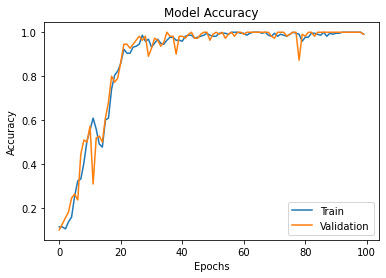

In [ ]:
#đánh giá chất lượng của mô hình và vẽ lại
score = model.evaluate(validation_data,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
model.save('model_11_To_Tien_VN.h5')
model=load_model('model_11_To_Tien_VN.h5')

200


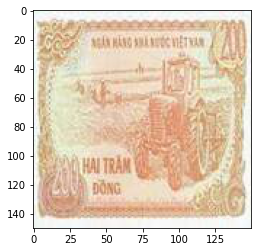

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/200VND/download (3).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='10000000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)

100000


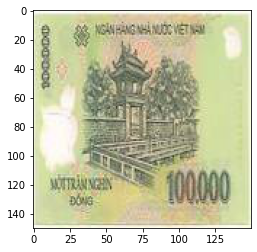

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/100000VND/images (6).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)

20000


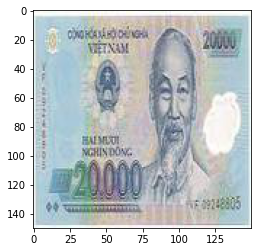

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/20000VND/download (15).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)

1000


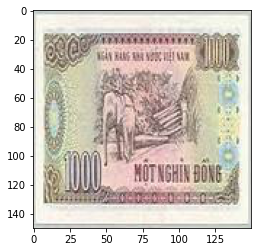

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/1000VND/download.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)

500


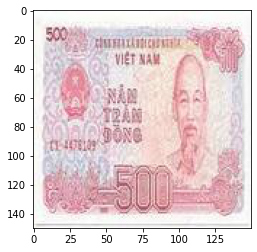

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/500VND/download.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)

500000


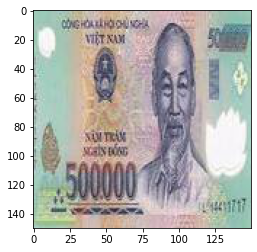

In [ ]:
img=load_img("/content/drive/MyDrive/btvn3/TIEN/test (1)/500000VND/images (1).jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='100000'
if round(result[0][1])==1:
  prediction='10000'
if round(result[0][2])==1:
  prediction='1000'
if round(result[0][3])==1:
  prediction='200000'
if round(result[0][4])==1:
  prediction='20000'
if round(result[0][5])==1:
  prediction='2000'
if round(result[0][6])==1:
  prediction='200'
if round(result[0][7])==1:
  prediction='500000'
if round(result[0][8])==1:
  prediction='50000'
if round(result[0][9])==1:
  prediction='5000'
if round(result[0][10])==1:
  prediction='500'
print(prediction)